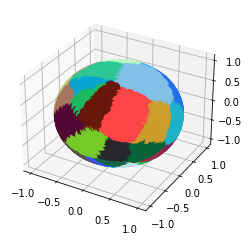

In [2]:
import numpy as np
from random import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

num_points = 10000
ref_points = 50

def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

rx, ry, rz = sample_spherical(ref_points)
reference_colors = [(random(),random(),random()) for x in range(len(rx))]

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

xi, yi, zi = sample_spherical(num_points)
colors = []
for i in range(len(xi)):
    point = np.array([xi[i], yi[i], zi[i]])
    distances = [np.linalg.norm(point-np.array([x,y,z])) for x,y,z in zip(rx,ry,rz)]
    colors.append(reference_colors[np.argmin(distances)])
    
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
ax.scatter(xi, yi, zi, s=50, color=colors)